In [1]:
#Dataframe Operations

import pandas as pd

#Mathematical Operations

import numpy as np

#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV

data = pd.read_csv('employee.csv')

#Check Shape 

data.shape

(1470, 35)

In [3]:
#Check Top 5 Rows

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Find Useless Columns

print('Number of Records in the Dataset: ',data.shape[0])
print('Number of Unique Values in the Employee Count Column: ',data['EmployeeCount'].nunique())
print('Number of Unique Values in the Employee Number Column: ',data['EmployeeNumber'].nunique())
print('Number of Unique Values in the Over 18 Column: ',data['Over18'].nunique())
print('Number of Unique Values in the Standard Hours Column: ',data['StandardHours'].nunique())

Number of Records in the Dataset:  1470
Number of Unique Values in the Employee Count Column:  1
Number of Unique Values in the Employee Number Column:  1470
Number of Unique Values in the Over 18 Column:  1
Number of Unique Values in the Standard Hours Column:  1


In [5]:
#Remove these columns from dataset

data = data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1)
print('Number of Columns left in the dataset after removal: ',data.shape[1])

Number of Columns left in the dataset after removal:  31


In [6]:
#Missing Values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:
#Check for Object Data Type Columns

data.select_dtypes('object').head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [8]:
#Encode Object Data types to Numerical Data Types except for Attrition Column

from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
data['BusinessTravel']=le.fit_transform(data['BusinessTravel'])
data['Department']=le.fit_transform(data['Department'])
data['EducationField']=le.fit_transform(data['EducationField'])
data['Gender']=le.fit_transform(data['Gender'])
data['JobRole']=le.fit_transform(data['JobRole'])
data['MaritalStatus']=le.fit_transform(data['MaritalStatus'])
data['OverTime']=le.fit_transform(data['OverTime'])

#Check if any object data type columns are left

data.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [10]:
#Split Target Attrition from dataset

y = data['Attrition']
x = data.drop(['Attrition'], axis=1)

#Check Shape of Dataset

print('Shape of x: ',x.shape)
print('Shape of y: ',y.shape)

Shape of x:  (1470, 30)
Shape of y:  (1470,)


In [11]:
#Check data is balance or not

data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# SMOTEENN

In [12]:
#Fix imbalance

from imblearn.combine import SMOTEENN

In [13]:
#Define Model

sn = SMOTEENN(random_state=0)

#Making Sample

x,y = sn.fit_resample(x,y)

#Class Distribution

y.value_counts()

Yes    838
No     640
Name: Attrition, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (1182, 30)
Shape of x_test:  (296, 30)
Shape of y_train:  (1182,)
Shape of y_test:  (296,)


In [16]:
#Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.79      0.87      0.83       125
         Yes       0.90      0.83      0.86       171

    accuracy                           0.85       296
   macro avg       0.84      0.85      0.85       296
weighted avg       0.85      0.85      0.85       296



# Correlation

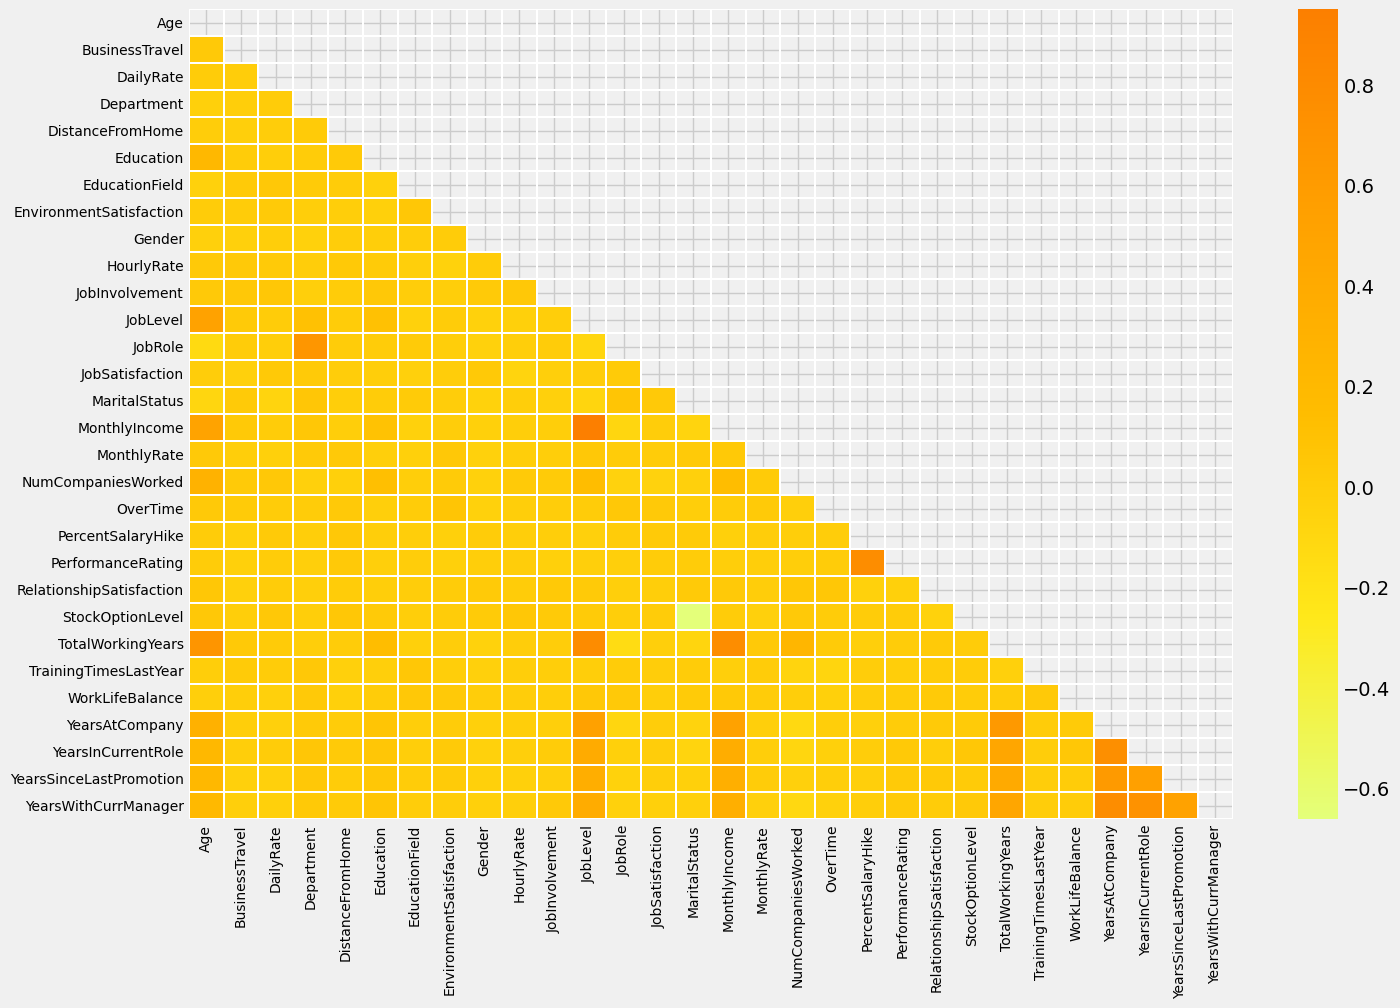

In [17]:
#HeatMap to check Correlation

plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('fivethirtyeight')

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='Wistia',linewidth=0.2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
#Removing Highly Correlated Columns

data_cf = data.drop(['JobRole','JobLevel','PercentSalaryHike',
                    'TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'],axis=1)

#Lets Check the Shape

data_cf.shape

(1470, 25)

In [19]:
data_cf['BusinessTravel']=le.fit_transform(data['BusinessTravel'])
data_cf['Department']=le.fit_transform(data['Department'])
data_cf['EducationField']=le.fit_transform(data['EducationField'])
data_cf['Gender']=le.fit_transform(data['Gender'])
data_cf['JobRole']=le.fit_transform(data['JobRole'])
data_cf['MaritalStatus']=le.fit_transform(data['MaritalStatus'])
data_cf['OverTime']=le.fit_transform(data['OverTime'])

#Check if any object data type columns are left

data_cf.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [20]:
#Split Target Attrition from dataset

y_cf = data_cf['Attrition']
x_cf = data_cf.drop(['Attrition'], axis=1)

#Check Shape of Dataset

print('Shape of x: ',x_cf.shape)
print('Shape of y: ',y_cf.shape)

Shape of x:  (1470, 25)
Shape of y:  (1470,)


In [21]:
#Define Model

sn = SMOTEENN(random_state=0)

#Making Sample

x_cf,y_cf = sn.fit_resample(x_cf,y_cf)

#Class Distribution

y_cf.value_counts()

Yes    838
No     641
Name: Attrition, dtype: int64

In [22]:
#Splitting the Data

x_train_cf, x_test_cf, y_train_cf, y_test_cf = train_test_split(x_cf, y_cf, test_size=0.2, random_state=0)

print('Shape of x_train_cf: ', x_train_cf.shape)
print('Shape of x_test_cf: ', x_test_cf.shape)
print('Shape of y_train_cf: ', y_train_cf.shape)
print('Shape of y_test_cf: ', y_test_cf.shape)

Shape of x_train_cf:  (1183, 25)
Shape of x_test_cf:  (296, 25)
Shape of y_train_cf:  (1183,)
Shape of y_test_cf:  (296,)


In [23]:
#Predictive Model

model = DecisionTreeClassifier()
model.fit(x_train_cf,y_train_cf)
y_pred_cf = model.predict(x_test_cf)

cr = classification_report(y_pred_cf,y_test_cf)
print(cr)

              precision    recall  f1-score   support

          No       0.76      0.88      0.82       118
         Yes       0.91      0.82      0.86       178

    accuracy                           0.84       296
   macro avg       0.84      0.85      0.84       296
weighted avg       0.85      0.84      0.85       296



# Variance Inflation Factor

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
#VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns

#Calculating VIF for each feature 
vif_data['VIF'] = [variance_inflation_factor(x.values,i)
                  for i in range (len(x.columns))]

vif_data.style.background_gradient(cmap='Wistia')

,feature,VIF
0,Age,35.471068
1,BusinessTravel,6.936126
2,DailyRate,5.499722
3,Department,11.165526
4,DistanceFromHome,2.711344
5,Education,9.876365
6,EducationField,3.981095
7,EnvironmentSatisfaction,7.125041
8,Gender,2.173840
9,HourlyRate,13.550311


In [26]:
#Creating Dependent and Non Dependent Sets

x_vif = data[['DistanceFromHome','EducationField','Gender',
                    'NumCompaniesWorked','OverTime','StockOptionLevel','YearsSinceLastPromotion']]

y_vif = data['Attrition']

In [27]:
#Define Model

sn = SMOTEENN(random_state=0)

#Making Sample

x_vif,y_vif = sn.fit_resample(x_vif,y_vif)

#Class Distribution

y_vif.value_counts()

Yes    813
No     579
Name: Attrition, dtype: int64

In [28]:
x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y_vif, 
                                                                    test_size=0.2, random_state=0)

print('Shape of x_train_vif: ', x_train_vif.shape)
print('Shape of x_test_vif: ', x_test_vif.shape)
print('Shape of y_train_vif: ', y_train_vif.shape)
print('Shape of y_test_vif: ', y_test_vif.shape)

Shape of x_train_vif:  (1113, 7)
Shape of x_test_vif:  (279, 7)
Shape of y_train_vif:  (1113,)
Shape of y_test_vif:  (279,)


In [29]:
#Predictive Model

model = DecisionTreeClassifier()
model.fit(x_train_vif,y_train_vif)
y_pred_vif = model.predict(x_test_vif)

cr = classification_report(y_pred_vif,y_test_vif)
print(cr)

              precision    recall  f1-score   support

          No       0.84      0.96      0.90       111
         Yes       0.97      0.88      0.93       168

    accuracy                           0.91       279
   macro avg       0.91      0.92      0.91       279
weighted avg       0.92      0.91      0.91       279



# Feature Selection with RFECV

In [30]:
from sklearn.feature_selection import RFECV

In [40]:
model = DecisionTreeClassifier()
rfecv = RFECV(estimator=model, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of feature: ',rfecv.n_features_)
print('Best Features: ', x_train.columns[rfecv.support_])

Optimal number of feature:  3
Best Features:  Index(['DailyRate', 'JobLevel', 'MonthlyIncome'], dtype='object')


In [41]:
x_rfecv = data[['DailyRate', 'JobLevel', 'MonthlyIncome']]
y_rfecv = data['Attrition']

In [42]:
#Define Model

sn = SMOTEENN(random_state=0)

#Making Sample

x_rfecv,y_rfecv = sn.fit_resample(x_rfecv,y_rfecv)

#Class Distribution

y_rfecv.value_counts()

Yes    659
No     543
Name: Attrition, dtype: int64

In [43]:
x_train_rfecv, x_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(x_rfecv, y_rfecv, 
                                                                    test_size=0.2, random_state=0)

print('Shape of x_train_rfecv: ', x_train_rfecv.shape)
print('Shape of x_test_rfecv: ', x_test_rfecv.shape)
print('Shape of y_train_rfecv: ', y_train_rfecv.shape)
print('Shape of y_test_rfecv: ', y_test_rfecv.shape)

Shape of x_train_rfecv:  (961, 3)
Shape of x_test_rfecv:  (241, 3)
Shape of y_train_rfecv:  (961,)
Shape of y_test_rfecv:  (241,)


In [44]:
#Predictive Model

model = DecisionTreeClassifier()
model.fit(x_train_rfecv,y_train_rfecv)
y_pred_rfecv = model.predict(x_test_rfecv)

cr = classification_report(y_pred_rfecv,y_test_rfecv)
print(cr)

              precision    recall  f1-score   support

          No       0.91      0.93      0.92       103
         Yes       0.95      0.93      0.94       138

    accuracy                           0.93       241
   macro avg       0.93      0.93      0.93       241
weighted avg       0.93      0.93      0.93       241



# Boruta Algorithm

In [46]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [48]:
#Define the Model
model = RandomForestClassifier(max_depth=5)

#Define Boruta Feature Selection Method
boruta = BorutaPy(estimator=model,n_estimators='auto',
                  max_iter=100,random_state=100)
boruta.fit(np.array(x),np.array(y))

#Print features
best_features = x.columns[boruta.support_].to_list()
print('Features to Keep: ',best_features)

Features to Keep:  ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [49]:
#Create Dependent and Independent sets for RFECV
x_bor = data[['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
              'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
              'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel', 
              'TotalWorkingYears', 'TrainingTimesLastYear', 
              'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y_bor = data['Attrition']

In [50]:
#Define Model

sn = SMOTEENN(random_state=0)

#Making Sample

x_bor,y_bor = sn.fit_resample(x_bor,y_bor)

#Class Distribution

y_bor.value_counts()

Yes    838
No     640
Name: Attrition, dtype: int64

In [51]:
x_train_bor, x_test_bor, y_train_bor, y_test_bor = train_test_split(x_bor, y_bor, 
                                                                    test_size=0.2, random_state=0)

print('Shape of x_train_bor: ', x_train_bor.shape)
print('Shape of x_test_bor: ', x_test_bor.shape)
print('Shape of y_train_bor: ', y_train_bor.shape)
print('Shape of y_test_bor: ', y_test_bor.shape)

Shape of x_train_bor:  (1182, 24)
Shape of x_test_bor:  (296, 24)
Shape of y_train_bor:  (1182,)
Shape of y_test_bor:  (296,)


In [52]:
#Predictive Model

model = DecisionTreeClassifier()
model.fit(x_train_bor,y_train_bor)
y_pred_bor = model.predict(x_test_bor)

cr = classification_report(y_pred_bor,y_test_bor)
print(cr)

              precision    recall  f1-score   support

          No       0.78      0.81      0.80       133
         Yes       0.84      0.82      0.83       163

    accuracy                           0.81       296
   macro avg       0.81      0.81      0.81       296
weighted avg       0.82      0.81      0.81       296

